# The Discounted Future Earnings (DFE) model

This Notebook will be used for calculating the Discounted Future Earnings (DFE) model as described in the Medium Post [Sure you know the stock price. But do you know its value?](https://medium.com/@sankha.mukherjee_007/sure-you-know-the-stock-price-but-do-you-know-its-value-65ab44dadd04) in Section 4.1. There are many versions of this model, and this implementation here is one of the more simpler implementations of the DFE model. 

This implementation will be as close as possible to the original article so that one is able to easily follow the original article and this one.

In [1]:
import financeMacroFactors as fM
import pandas as pd
import numpy as np
from scipy import interpolate
from datetime import timedelta as tDel
import matplotlib.pyplot as plt

In [2]:
fundamentals = fM.companies.getTickerFundamentalDataMW('MSFT')

## Find the Earnings Per Share (EPS)

The first part is to calculate the EPS vector **e** over the last 5 years. This is converted into a Numpy array `e1`.

In [3]:
eps = fM.companies.extractYearlyData(fundamentals['IncomeStatement'], 'EPS (Diluted)')
y, e1 = zip(*eps)
e1 = np.array(e1)
print(f'--------[Earnings per shaer]------------')
print(f'Years: {[m.year for m in y]}')
print(f'EPS during that time: e1 = {e1}')

--------[Earnings per shaer]------------
Years: [2016, 2017, 2018, 2019, 2020]
EPS during that time: e1 = [2.1  3.25 2.13 5.06 5.76]


## Extrapolate so that we can find the EPS for the next 5 years

The extrapolation is simple. This assumes that there are 365 days in each year. This may not be the case, but should not affect our calculations significantly, gven the type of approximations that are already involved.

In [4]:
xVals = [(m-y[0]).days for m in y ]
futureYears = [ (y[-1] + tDel(i*365) ) for i in range(1,6)]
xExt  = [(m-y[0]).days for m in futureYears ]
f = interpolate.interp1d(xVals, e1, fill_value="extrapolate")
e = f(xExt)

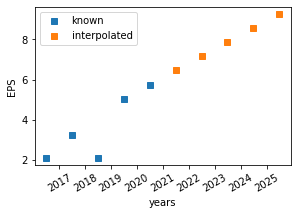

In [5]:
plt.figure(figsize=(4, 4/1.618))
plt.axes([0.1, 0.1, 0.89, 0.89])

plt.plot(y, e1, 's', label='known')
plt.plot(futureYears, e, 's', label='interpolated')


plt.xticks(rotation=30)
plt.xlabel('years')
plt.ylabel('EPS')
plt.legend()

plt.show()
plt.close('all')

## Add the terminal value

for the last interpolated value, change it to 10$\times$ its projexted value

In [6]:
e[-1] *= 10

In [7]:
e

array([ 6.45808743,  7.15617486,  7.8542623 ,  8.55234973, 92.50437158])

## Generate the discounting factors

In [8]:
d = (np.ones(5)*1.1)**np.arange(-1,-6, -1)

## Generate the DFE value

In [9]:
dfe = e @ d
print(f'Discounted Future Value = ${dfe:.2f}')

Discounted Future Value = $80.97
